In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.layers import Conv2D, Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading Dataset 
file_name = 'Dataset/SVHN_single_grey1.h5'

# TO create HDF file object
df = h5py.File(file_name,'r')

In [4]:
# converting the images from ..input/>.h5 file to numpy array
data = np.array(df)
test_x = np.array(df['X_test'])
train_x = np.array(df['X_train'])
val_x = np.array(df['X_val'])

test_y = np.array(df['y_test'])
train_y = np.array(df['y_train'])
val_y = np.array(df['y_val'])

In [5]:
# Cheking type of converted array
print(type(test_x))
print(type(train_x))
print(type(val_x))

print(type(test_y))
print(type(train_y))
print(type(val_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


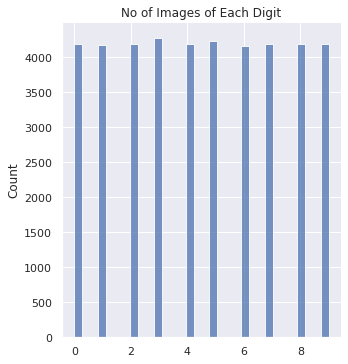

In [6]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.displot(data, x=train_y, facet_kws=dict(margin_titles=True),)


plt.title("No of Images of Each Digit")
plt.show()

In [7]:
train_x[0].max()

130.4922

In [8]:
train_x[0].shape

(32, 32)

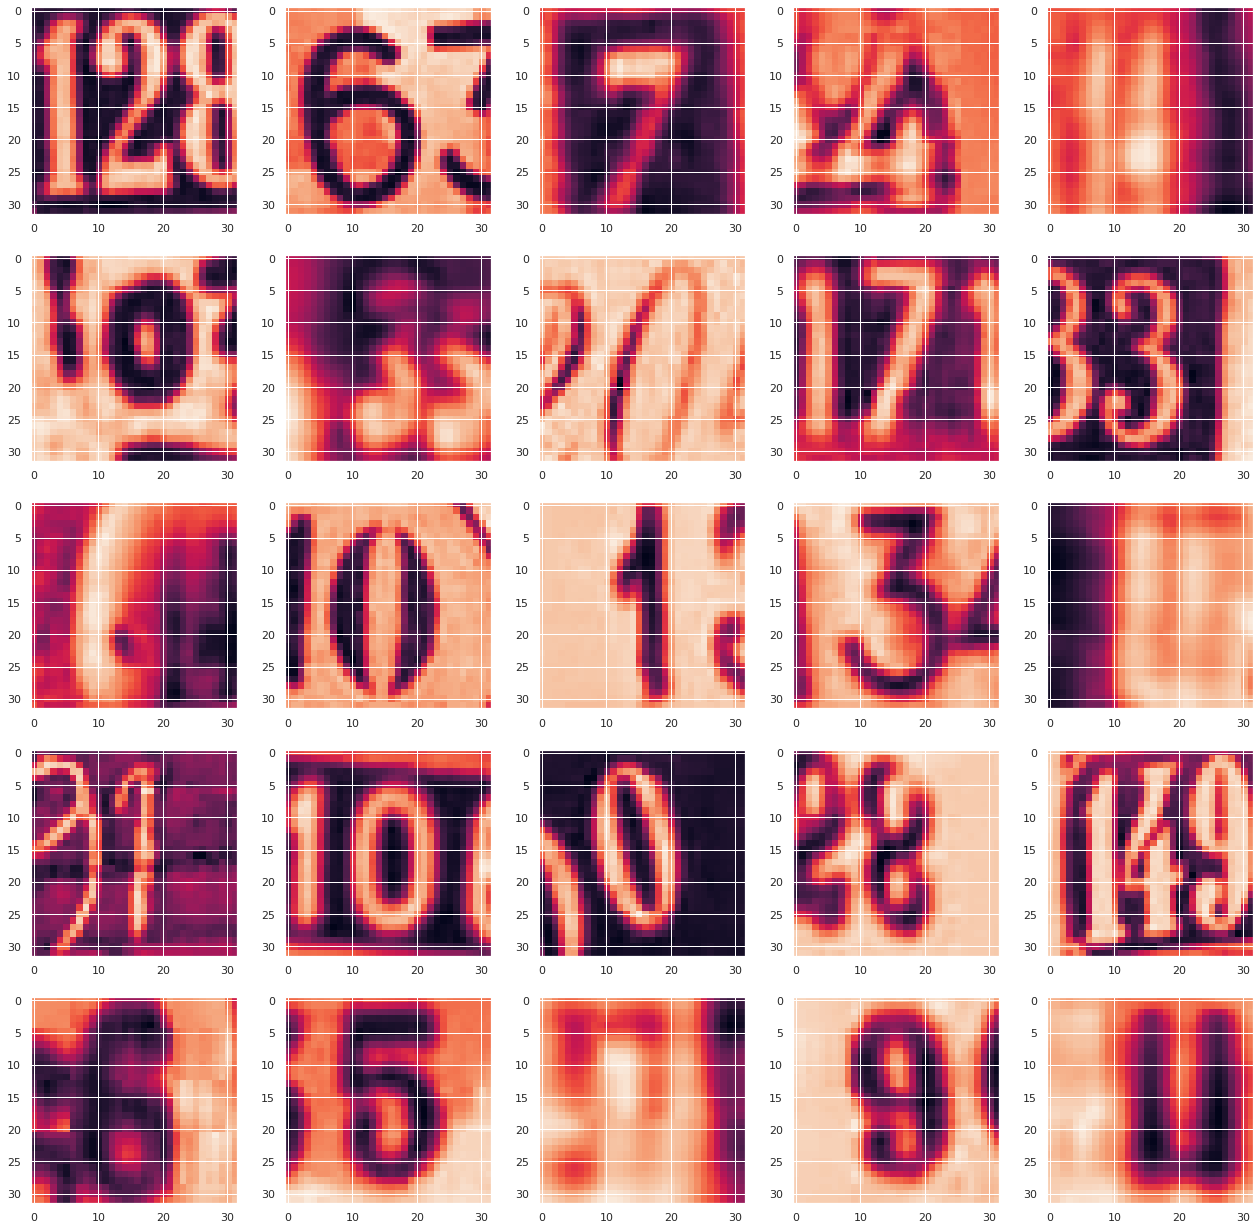

In [9]:
# Define a figure of size (22, 22)
fig=plt.figure(figsize=(22, 22))

# Define row and cols in the figure
rows, cols = 5, 5

# Display first four 10
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(train_x[j])
plt.show()

In [10]:
# Checking Lowest and Highest Pixel Value
print("Lowest Pixel Value:", train_x[0].min(),"Highest Pixel Value:", train_x[0].max())

Lowest Pixel Value: 14.5482 Highest Pixel Value: 130.4922


In [11]:
# # `EarlyStopping` is used based on `val_loss` to prevent overfitting
# # When a monitored metric0 has stopped improving, training is stopped
# from tensorflow.keras.callbacks import EarlyStopping
# es = EarlyStopping(monitor='val_loss', mode='auto', patience=3, restore_best_weights=True, verbose=1)

In [12]:
# use min-max scaler to make max value as 1 and min valuer 0
scaler=MinMaxScaler()

train_x=scaler.fit_transform(train_x.reshape(-1,train_x.shape[-1])).reshape(train_x.shape)
test_x=scaler.transform(test_x.reshape(-1,test_x.shape[-1])).reshape(test_x.shape)
val_x=scaler.transform(val_x.reshape(-1,val_x.shape[-1])).reshape(val_x.shape)

In [13]:
model=Sequential()
#Input Layer
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D((2,2)))
# Hillden Layer 1
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
#Hidden Layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

2023-01-24 20:20:27.571112: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 20:20:27.572177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 20:20:27.583532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 20:20:27.584368: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 20:20:27.585143: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
# model.fit(train_x,train_y,epochs=20) 

# expected min_ndim=4, found ndim=3. Full shape received: (None, 32, 32)

In [16]:
# Cheking the shape
train_x.shape

(42000, 32, 32)

In [17]:
# Afteradd 1 - Diemension To return the same data with a new shape

train_x = train_x.reshape(-1, 32, 32, 1)
val_x = val_x.reshape(-1, 32, 32, 1)
test_x = test_x.reshape(-1, 32, 32, 1)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [19]:
history = model.fit(train_x, train_y, 
          batch_size=86,
          validation_data=(val_x, val_y), 
#           callbacks=[es],
          epochs=72)

2023-01-24 20:20:30.158507: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/72


2023-01-24 20:20:31.139010: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


489/489 [==============================] - 7s 8ms/step - loss: 1.3183 - accuracy: 0.5647 - val_loss: 0.8147 - val_accuracy: 0.7493
Epoch 2/72
489/489 [==============================] - 3s 7ms/step - loss: 0.6478 - accuracy: 0.8155 - val_loss: 0.5713 - val_accuracy: 0.8414
Epoch 3/72
489/489 [==============================] - 3s 7ms/step - loss: 0.5453 - accuracy: 0.8469 - val_loss: 0.5031 - val_accuracy: 0.8596
Epoch 4/72
489/489 [==============================] - 3s 7ms/step - loss: 0.4848 - accuracy: 0.8628 - val_loss: 0.4566 - val_accuracy: 0.8748
Epoch 5/72
489/489 [==============================] - 3s 7ms/step - loss: 0.4412 - accuracy: 0.8753 - val_loss: 0.4248 - val_accuracy: 0.8808
Epoch 6/72
489/489 [==============================] - 4s 7ms/step - loss: 0.4055 - accuracy: 0.8855 - val_loss: 0.3895 - val_accuracy: 0.8918
Epoch 7/72
489/489 [==============================] - 3s 7ms/step - loss: 0.3777 - accuracy: 0.8919 - val_loss: 0.3749 - val_accuracy: 0.8932
Epoch 8/72
489/48

In [20]:
model.evaluate(train_x, train_y)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0303 - accuracy: 0.9904


[0.030256617814302444, 0.9903571605682373]

In [21]:
model.evaluate(test_x, test_y)

563/563 [==============================] - 1s 2ms/step - loss: 0.8400 - accuracy: 0.8963


[0.8400235176086426, 0.8962777853012085]

In [22]:
model.evaluate(val_x, val_y)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9621


[0.27318650484085083, 0.9621333479881287]

In [23]:
#Saving the model
model.save('CNN_Model.h5')

In [24]:
# # `EarlyStopping` is used based on `val_loss` to prevent overfitting
# # When a monitored metric0 has stopped improving, training is stopped
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='auto', patience=3, restore_best_weights=True, verbose=1)

In [25]:
from tensorflow.keras import initializers
from tensorflow.keras.layers import Conv2D, MaxPool2D

#     Build a CNN with two convolutional + two max pooling layers, followed by two dense layers
#     out: model: the model we just built
model1 = Sequential()

model1.add(Conv2D(16,kernel_size=(3,3),
                 activation='relu',kernel_initializer = initializers.
                 RandomNormal(mean=0., stddev=0.1),input_shape=(32, 32,1)))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2)))


model1.add(Conv2D(16,kernel_size=(3,3),
                 activation='relu',kernel_initializer = initializers.
                 RandomNormal(mean=0., stddev=0.1)))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2)))


model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))

In [26]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [28]:
history = model1.fit(train_x, train_y,
          batch_size=35,
          validation_data=(val_x, val_y),
          callbacks=[es],
          epochs=25)

Epoch 1/25
1200/1200 [==============================] - 8s 6ms/step - loss: 1.9820 - accuracy: 0.3042 - val_loss: 1.2121 - val_accuracy: 0.6741
Epoch 2/25
1200/1200 [==============================] - 9s 7ms/step - loss: 1.1737 - accuracy: 0.6059 - val_loss: 0.8207 - val_accuracy: 0.7533
Epoch 3/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.9618 - accuracy: 0.6855 - val_loss: 0.5676 - val_accuracy: 0.8298
Epoch 4/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.8556 - accuracy: 0.7277 - val_loss: 0.5035 - val_accuracy: 0.8604
Epoch 5/25
1200/1200 [==============================] - 7s 6ms/step - loss: 0.8183 - accuracy: 0.7394 - val_loss: 0.5925 - val_accuracy: 0.8231
Epoch 6/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.7740 - accuracy: 0.7549 - val_loss: 0.5817 - val_accuracy: 0.8217
Epoch 7/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.7462 - accuracy: 0.7645 - val_loss: 0.5206 - val_accuracy:

In [29]:
model1.evaluate(train_x, train_y)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.4972 - accuracy: 0.8626


[0.4972338080406189, 0.8626190423965454]

In [30]:
model1.evaluate(test_x,test_y)

563/563 [==============================] - 1s 2ms/step - loss: 0.5182 - accuracy: 0.8553


[0.5181648135185242, 0.8553333282470703]

In [31]:
model1.evaluate(val_x,val_y)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5035 - accuracy: 0.8604


[0.5035132765769958, 0.8604333400726318]

In [32]:
model1.save('CNN_Model1.h5')

In [33]:
# building model2

#     Build an MLP model with a Flatten and four Dense layer

model2 = Sequential()

#Input Layer
model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model2.add(MaxPooling2D((2,2)))

# Hillden Layer 1
model2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))

#Hidden Layer 2
model2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))


model2.add(Flatten())
model2.add(Dense(512, activation='relu', kernel_initializer = initializers.RandomNormal(mean=0., stddev=0.1)))
model2.add(Dense(64, activation='relu', kernel_initializer = initializers.RandomNormal(mean=0., stddev=0.1)))
model2.add(Dense(32, activation='relu', kernel_initializer = initializers.RandomNormal(mean=0., stddev=0.1)))
model2.add(Dense(10, activation='softmax'))

In [34]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [36]:
history=model2.fit(train_x,train_y,
        batch_size=62,
        validation_data=(val_x, val_y),
        callbacks=[es],
        epochs=25)

Epoch 1/25
678/678 [==============================] - 6s 8ms/step - loss: 1.2111 - accuracy: 0.5901 - val_loss: 0.6118 - val_accuracy: 0.8279
Epoch 2/25
678/678 [==============================] - 5s 8ms/step - loss: 0.5548 - accuracy: 0.8377 - val_loss: 0.4587 - val_accuracy: 0.8668
Epoch 3/25
678/678 [==============================] - 4s 6ms/step - loss: 0.4380 - accuracy: 0.8698 - val_loss: 0.3996 - val_accuracy: 0.8845
Epoch 4/25
678/678 [==============================] - 5s 7ms/step - loss: 0.3720 - accuracy: 0.8887 - val_loss: 0.3484 - val_accuracy: 0.8963
Epoch 5/25
678/678 [==============================] - 5s 8ms/step - loss: 0.3303 - accuracy: 0.9000 - val_loss: 0.3073 - val_accuracy: 0.9082
Epoch 6/25
678/678 [==============================] - 5s 7ms/step - loss: 0.2961 - accuracy: 0.9101 - val_loss: 0.3093 - val_accuracy: 0.9078
Epoch 7/25
678/678 [==============================] - 4s 6ms/step - loss: 0.2674 - accuracy: 0.9190 - val_loss: 0.2608 - val_accuracy: 0.9238
Epoch 

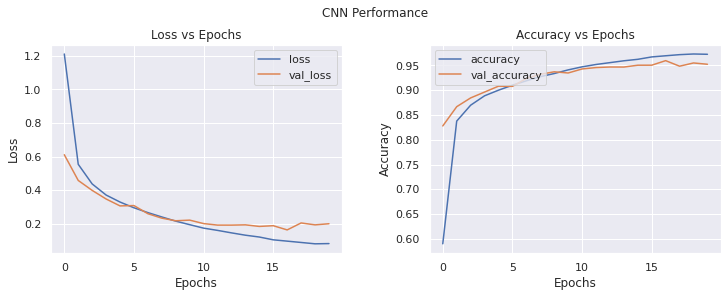

In [37]:
f, (f1, f2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

f1.plot(history.history['loss'])
f1.plot(history.history['val_loss'])
f1.set_title('Loss vs Epochs')
f1.set_xlabel('Epochs')
f1.set_ylabel('Loss')
l1=f1.legend(['loss','val_loss'], loc='upper right')


f2.plot(history.history['accuracy'])
f2.plot(history.history['val_accuracy'])
f2.set_title('Accuracy vs Epochs')
f2.set_xlabel('Epochs')
f2.set_ylabel('Accuracy')
l2=f2.legend(['accuracy','val_accuracy'], loc='upper left')

In [38]:
model2.evaluate(train_x, train_y)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0655 - accuracy: 0.9818


[0.06546281278133392, 0.9817857146263123]

In [39]:
model2.evaluate(test_x, test_y)

563/563 [==============================] - 1s 2ms/step - loss: 0.3956 - accuracy: 0.9081


[0.3955756425857544, 0.9080555438995361]

In [40]:
model2.evaluate(val_x, val_y)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1645 - accuracy: 0.9597


[0.16449666023254395, 0.9596666693687439]

In [41]:
model2.save('CNN_Model2.h5')

In [42]:
# Model3 with 2% dropout

#     Build an MLP model with a Flatten and two Dense layer
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

In [43]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                147520    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [45]:
history=model3.fit(train_x,train_y,
        batch_size=66,
        validation_data=(val_x,val_y),
        callbacks=[es],
        epochs=25)

Epoch 1/25
637/637 [==============================] - 5s 7ms/step - loss: 1.3065 - accuracy: 0.5715 - val_loss: 0.6161 - val_accuracy: 0.8322
Epoch 2/25
637/637 [==============================] - 5s 7ms/step - loss: 0.6802 - accuracy: 0.7972 - val_loss: 0.5037 - val_accuracy: 0.8549
Epoch 3/25
637/637 [==============================] - 4s 6ms/step - loss: 0.5804 - accuracy: 0.8248 - val_loss: 0.4449 - val_accuracy: 0.8710
Epoch 4/25
637/637 [==============================] - 4s 6ms/step - loss: 0.5199 - accuracy: 0.8413 - val_loss: 0.4130 - val_accuracy: 0.8843
Epoch 5/25
637/637 [==============================] - 4s 6ms/step - loss: 0.4813 - accuracy: 0.8527 - val_loss: 0.3752 - val_accuracy: 0.8897
Epoch 6/25
637/637 [==============================] - 4s 6ms/step - loss: 0.4514 - accuracy: 0.8623 - val_loss: 0.3736 - val_accuracy: 0.8898
Epoch 7/25
637/637 [==============================] - 4s 6ms/step - loss: 0.4226 - accuracy: 0.8703 - val_loss: 0.3468 - val_accuracy: 0.8975
Epoch 

In [46]:
model3.evaluate(train_x,train_y)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.1417 - accuracy: 0.9580


[0.14166367053985596, 0.9579523801803589]

In [47]:
model3.evaluate(test_x,test_y)

563/563 [==============================] - 1s 2ms/step - loss: 0.3977 - accuracy: 0.8966


[0.3976711630821228, 0.8965555429458618]

In [48]:
model3.evaluate(val_x,val_y)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2185 - accuracy: 0.9395


[0.21846595406532288, 0.9395333528518677]

In [49]:
model3.save('CNN_Model3.h5')

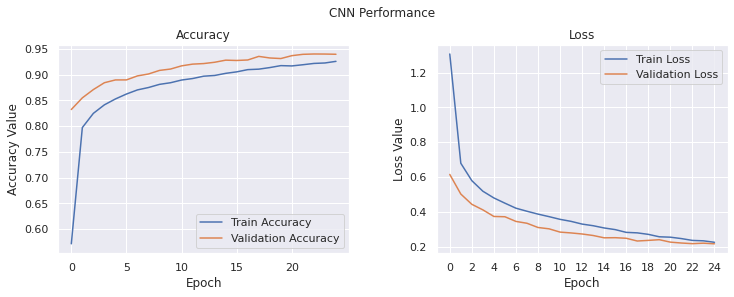

In [50]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,25))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 25, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 25, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [51]:
from tensorflow.keras.models import load_model

# Load the saved Model
saved_model = load_model('CNN_Model.h5')

In [52]:
# Cheking if model is working
saved_model.evaluate(train_x, train_y)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0303 - accuracy: 0.9904


[0.030256617814302444, 0.9903571605682373]

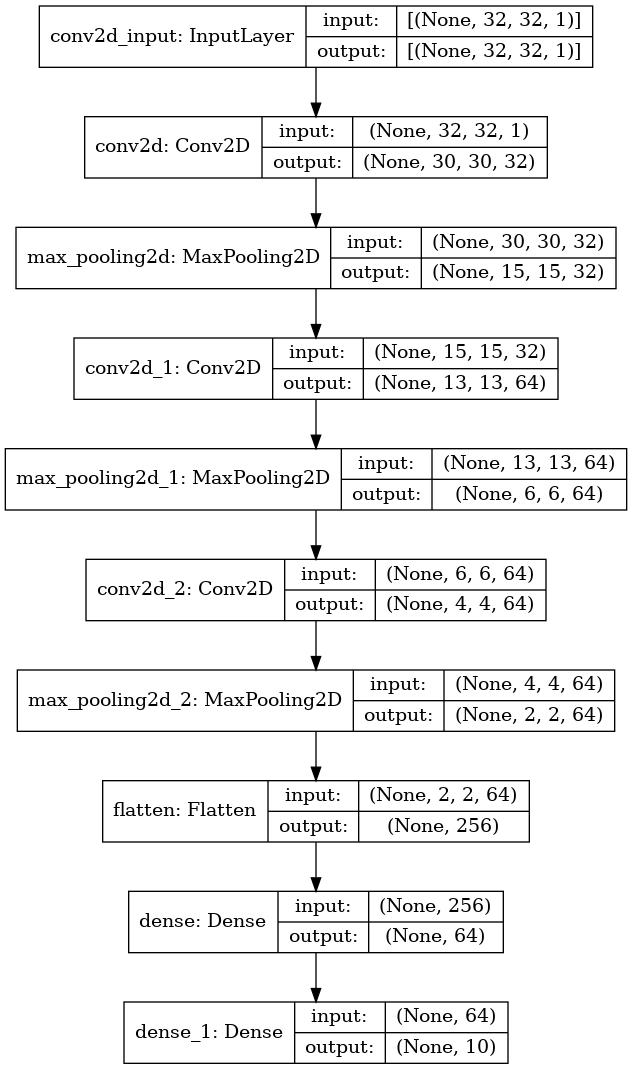

In [53]:
from keras.utils.vis_utils import plot_model
#Show Model Architecture
plot_model(saved_model,'CNN_Model.h5.jpg',show_shapes=True,show_layer_names=True)

In [54]:
# Getting model predictions
test_predictions = saved_model.predict(test_x)
preds = np.argmax(test_predictions, axis=1)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
# Showing Classification Report
# To build a  report on the classification metrics
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1814
           1       0.85      0.92      0.88      1828
           2       0.93      0.90      0.92      1803
           3       0.85      0.88      0.87      1719
           4       0.89      0.92      0.91      1812
           5       0.90      0.88      0.89      1768
           6       0.92      0.87      0.89      1832
           7       0.95      0.89      0.92      1808
           8       0.88      0.89      0.88      1812
           9       0.88      0.88      0.88      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



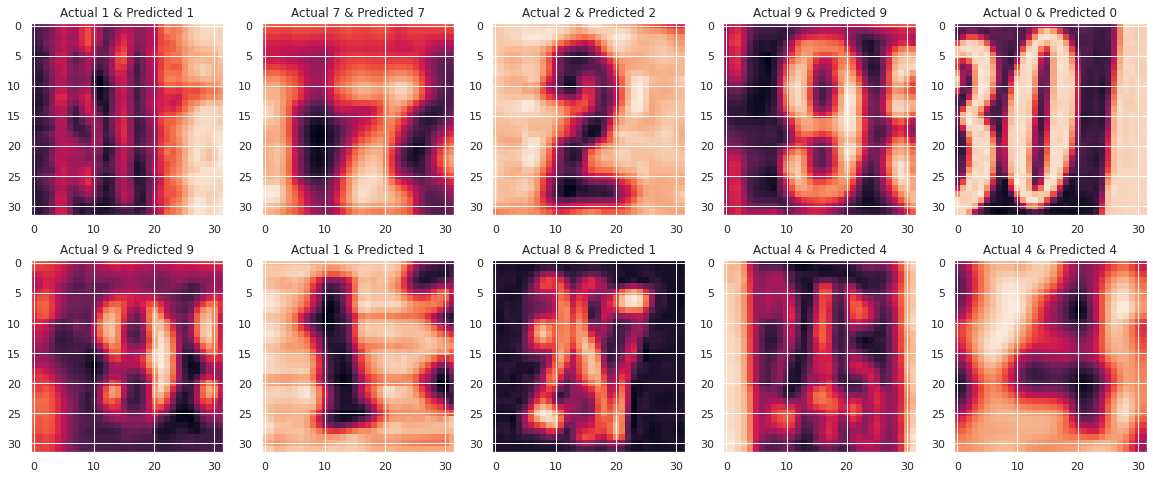

In [56]:
## Visualize the Image with Actual Label and Predicted Label using imshow function from Matplotlib
y = test_y

fig = plt.figure(figsize=(20,8))
axes = fig.subplots(nrows=2, ncols=5)

axes[0,0].set_title('Actual {} & Predicted {}'.format(y[0],preds[0]))  ## Label 
axes[0,0].imshow(test_x[0]) ## Image

axes[0,1].set_title('Actual {} & Predicted {}'.format(y[1],preds[1]))
axes[0,1].imshow(test_x[1])

axes[0,2].set_title('Actual {} & Predicted {}'.format(y[2],preds[2]))
axes[0,2].imshow(test_x[2])

axes[0,3].set_title('Actual {} & Predicted {}'.format(y[3],preds[3]))
axes[0,3].imshow(test_x[3])

axes[0,4].set_title('Actual {} & Predicted {}'.format(y[4],preds[4]))
axes[0,4].imshow(test_x[4])

axes[1,0].set_title('Actual {} & Predicted {}'.format(y[5],preds[5]))
axes[1,0].imshow(test_x[5])

axes[1,1].set_title('Actual {} & Predicted {}'.format(y[6],preds[6]))
axes[1,1].imshow(test_x[6])

axes[1,2].set_title('Actual {} & Predicted {}'.format(y[7],preds[7]))
axes[1,2].imshow(test_x[7])

axes[1,3].set_title('Actual {} & Predicted {}'.format(y[8],preds[8]))
axes[1,3].imshow(test_x[8])

axes[1,4].set_title('Actual {} & Predicted {}'.format(y[9],preds[9]))
axes[1,4].imshow(test_x[9])
plt.show()